# **1. Overview of Gaussian Naive Bayes for classification**
GitHub link:
https://github.com/tongsu-brown/DATA2060_grouproject.git

**1.1 overview of the algorithm:**

**1.1.1 Description:**

Gaussian Naive Bayes is a generative model for classification. It applies the similar assumpotion as Naive Bayes that the features are conditionally independent. [1,2](#ref-1,2)

Instead of limiting features to be discrete(categorical, binary) in Naive Bayes, the features in Gaussian Naive Bayes can be continous. We first assume the probabliity of lables are same as $P[Y=1]=P[Y=0] = 1/2$. Then the conditional likelihood (probability of $X$ given $Y$) is a Gaussian distribution:

$$P(x_i|y)=\frac{1}{\sqrt{(2\pi\sigma_y^2)}}exp(-\frac{(x_i-μ_y)^2}{2σ_y^2})$$

where the variance $σ_y$ and mean $μ_y$ for class $y$ are estiamted by the MLE (maximum likelihood estimator):
$$h_{Bayes}(x) = \mathrm{argmax}_{y\in\{0,1\}}[\mathrm{log}(p(y))+Σ_i\mathrm{log}p(x_i|y)] $$



**1.1.2 Advantages:**

*   efficient and powerful: have competitive performance even if the conditional independence is voided [3](#ref-3)
*   fast and stable: MLE and trained in lower space but works well for higher dimension
*   in-situ update: support online updates to parameters via [partial fit](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?utm_source=chatgpt.com#sklearn.naive_bayes.GaussianNB.partial_fit)


**1.1.3 Disadvantage:**

*   Assume features to be conditional independent, but not always true
*   Assume Gaussian distribution, but features can have other distribution like delta, even or just random



### **1.2 Representation:**

describe how the feature values are converted into a single number prediction.

For $d$ continous features $X \in \mathbb{R}^d$,   $x = (x_1,...,x_d)$

Class $y$ can be binary $y \in \{0,1\}$ or $K$ multiclass $y \in \{0,1,...K-1\}$

The conditionally independent likelihood can be represented by:
$$
p(x\mid y) = \prod_{i=1}^d \mathcal{N}(x_i \mid μ_{iy}, σ_{iy}^2) = \prod_{i=1}^d\frac{1}{\sqrt{(2\pi\sigma_{iy}^2)}}exp(-\frac{(x_i-μ_{iy})^2}{2σ_{iy}^2})
$$
where $μ = \mathbb{E}[x] \in \mathbb{R}^d $ and $σ^2 \in \mathbb{R}_+^{\,d}$

If we use covariance matrix $Σ = \mathrm{cov}(x) = \mathrm{Var}(x) \in \mathbb{R}^{d\times d}$, the conditional likelihood can be written by:

$$
p(\mathbf{x}\mid y)
= \mathcal{N}(\mathbf{x}\mid \boldsymbol{\mu}_y,\boldsymbol{\Sigma}_y)
= \frac{1}{(2\pi)^{d/2}\,|\boldsymbol{\Sigma}_y|^{1/2}}
\exp\!\left(
-\tfrac12 (\mathbf{x}-\boldsymbol{\mu}_y)^{\top}\boldsymbol{\Sigma}_y^{-1}(\mathbf{x}-\boldsymbol{\mu}_y)
\right).
$$


### **1.3 Loss:**

Gaussian Naive Bayes uses Maximum Likelihood Estimation (MLE) to train the model. Unlike discriminative models that directly minimize prediction error, GNB takes a generative approach by modeling the joint probability distribution of features and labels. The objective is to find a set of parameters $\theta = (\mu, \sigma^2, P(y))$, that maximizes the probability (likelihood) $L(\theta | D)$ of the training data $D$ occurring.
Given a training dataset $D = \{(x^{(j)}, y^{(j)})\}_{j=1}^n$ where $x^{(j)} \in \mathbb{R}^d$ and
$y^{(j)} \in \{0, 1, \ldots, K-1\}$, the likelihood function is:

$$
L(\theta \mid D)
= \prod_{j=1}^n P\big(y^{(j)}, x^{(j)}\big)
= \prod_{j=1}^n P\big(y^{(j)}\big)\prod_{i=1}^d P\big(x_i^{(j)} \mid y^{(j)}\big)
$$


And numerical stability and easier computation, we typically maximize the log-likelihood instead, which converts the product into a sum:
$$  
\ell(\theta | D) = \sum_{(\mathbf{x}^{(j)}, y^{(j)}) \in D} \left( \log P(y^{(j)}) + \sum_{i=1}^{d} \log P(x_i^{(j)} | y^{(j)}) \right)
$$
Due to the naive assumption, the parameters for $\log P(y^{(j)})$ and the parameters for each $\log P(x_i^{(j)} | y^{(j)})$ (i.e., $\mu_{k,i}, \sigma_{k,i}^2$) can be optimized independently. <br>
This transformation is valid because the logarithm is a monotonically increasing function, so maximizing the log-likelihood is equivalent to maximizing the original likelihood. Due to the naive assumption of conditional independence among features, the parameters can be optimized independently. The class prior parameters depend only on the class label distribution, while for each class and feature, the mean and variance parameters depend only on the samples belonging to that class.<br>
While MLE maximizes likelihood, we can equivalently view this as minimizing the negative log-likelihood, which aligns with the typical machine learning framework of minimizing a loss function. The use of MLE as the training objective means there are no hyperparameters to tune, and the optimal parameters can be computed directly through closed-form solutions rather than iterative optimization. However, without regularization, MLE can overfit when training data is limited, particularly when some features have very small variance within certain classes.




### **1.4 Optimizer:**

For Gaussian Navie Bayes, training is interpreted by maximizing the log likelihood(MLE). So it is a closed-form solution without the interative numerical optimizer.

### **1.5 Algorithm Pseudocode:**
**1.5.1 Train**
**Input:**  
- `X_train`: training data, shape (n_samples, n_features)  
- `y_train`: training labels, length n_samples  


1. Get basic information  
   - `classes ← unique(y_train)`  
   - `n_classes ← length(classes)`  
   - `n_features ← number of columns in X_train`  
2. Initialize model parameters:μ, σ², priors
3. FOR `idx` from `0` to `n_classes − 1`:
   1. Let `c ← classes[idx]`  
   2. Select samples of class `c`:  
      - `X_c ← rows of X_train where y_train == c`  
   3. Compute MLE estimates for this class:  
      - `μ[idx, :] ← mean of X_c over rows`  
      - `σ²[idx, :] ← variance of X_c over rows`  
   4. Compute class prior:  
      - `priors[idx] ← (number of rows in X_c) / (number of rows in X_train)`  
4. Apply variance smoothing for numerical stability:  
   - `ε ← var_smoothing × max(variance(X_train))`  
   - `σ² ← σ² + ε`  

**1.5.2 Joint Log-Likelihood Computation**
**Input:**  
- `X_input`: data to evaluate, shape (n_samples, n_features)  

1. Let `n_samples ← number of rows in X_input`  
2. Initialize:  
   - `joint_log_likelihood ← zeros(n_samples, n_classes)`  

3. FOR `idx` from `0` to `n_classes − 1`:
   1. Compute log prior for this class:  
      - `log_prior ← log(priors[idx])`  
   2. For all samples in `X_input`, compute Gaussian log-likelihood under class `idx`  
      - Using `μ[idx, :]` and `σ²[idx, :]` for the Gaussian density  
      - `log_likelihood ← sum over all features of log Gaussian density`  
   3. Combine prior and likelihood:  
      - `joint_log_likelihood[:, idx] ← log_prior + log_likelihood`  

4. Return `joint_log_likelihood`.  

**1.5.3 Prediction**
**Input:**  
- `X_input`: test data, shape (n_samples, n_features)  

1. Compute joint log-likelihoods for all samples:  
   - `joint_log_likelihood ← JointLogLikelihood(X_input)`  

2. Initialize prediction array `y_pred` of length `n_samples`.  

3. FOR `i` from `0` to `n_samples − 1`:
   1. Find index of maximum log-likelihood:  
      - `class_idx ← argmax over classes of joint_log_likelihood[i, :]`  
   2. Map index back to class label:  
      - `y_pred[i] ← classes[class_idx]`  

4. Return `y_pred` as the predicted labels for `X_input`.

## References

<a id="ref-1"></a>[1] scikit-learn User Guide — Naive Bayes (Gaussian formula, MLE parameters, practical notes). [scikit-learn](https://scikit-learn.org/stable/modules/naive_bayes.html?utm_source=chatgpt.com#gaussian-naive-bayes)

<a id="ref-2"></a>[2] Shalev-Shwartz S, Ben-David S. Understanding Machine Learning: From Theory to Algorithms. Cambridge University Press; 2014.[brown-access-only](https://www-cambridge-org.revproxy.brown.edu/core/books/understanding-machine-learning/3059695661405D25673058E43C8BE2A6)

<a id="ref-3"></a>[3] Zhang, Harry. "The optimality of naive Bayes." Aa 1.2 (2004): 3. [Zhang](https://www.cs.unb.ca/~hzhang/publications/FLAIRS04ZhangH.pdf)


# **2. Model**

In [ ]:
import numpy as np
import pandas as pd

class GaussianNaiveBayes(object):

    """ Gaussian Naive Bayes model

    @attrs:
        n_classes:    the number of classes, as defined by object
        #attr_dist:    a 2D (n_classes x n_attributes) NumPy array of the attribute distributions
        label_priors: a 1D NumPy array of the priors distribution
        mu:           a 2D (n_classes x n_attributes) NumPy array of the means for each class
        var:        a 2D (n_classes x n_attributes) NumPy array of the variance for each class

    """

    def __init__(self, var_smoothing = 1e-9):

        """ Initialize a Gaussian Naive Bayes model with n_classes"""

        self.classes      = None
        self.n_classes    = None
        #self.attr_dist    = None
        self.label_priors = None
        self.mu           = None
        self.var        = None
        self.var_smoothing = var_smoothing


    def train(self, X_train, y_train):

        """ Trains the model, using maximum likelihood estimation.
        @params:
            X_train: a 2D (n_examples x n_attributes) numpy array
            y_train: a 1D (n_examples) numpy array
        @return:
            a tuple consisting of:
                1) mu:    a 2D (n_classes x n_attributes) NumPy array of the means for each class
                2) var: a 2D (n_classes x n_attributes) NumPy array of the variances for each class
                3) label_priors: a 1D NumPy array of the priors distribution
        """

        if isinstance(X_train, pd.DataFrame):
            X_train = X_train.values
        if isinstance(y_train, pd.Series):
            y_train = y_train.values

        n_features = X_train.shape[1]

        self.classes = np.unique(y_train) #np unique classes
        self.n_classes = len(self.classes)
        self.label_priors = np.zeros(self.n_classes)
        #self.attr_dist    = np.zeros((self.n_classes, X_train.shape[1]))
        self.mu           = np.zeros((self.n_classes, n_features)) #不必重复调用X_train.shape，使用n_features 代替
        self.var        = np.zeros((self.n_classes, n_features))

        for idx in range(self.n_classes):
            c=self.classes[idx]
            X_c = X_train[y_train == c]

            '''
            # Update: check for empty class
            if X_c.shape[0] == 0:
                raise ValueError(f"Class {c} has no training samples. All classes must have at least one sample.")
                ''' #使用unique的情况下，不需要test empty class


            #self.mu = np.mean(X_c, axis=0)  # 每次循环都被覆盖了吧？
            #self.sigma = np.std(X_c, axis=0)  # ^
            self.mu[idx, :] = np.mean(X_c, axis=0) # 已修改成对应的类
            self.var[idx, :] = np.var(X_c, axis=0)
            self.label_priors[idx] = X_c.shape[0] / X_train.shape[0]

        epslion = self.var_smoothing * np.var(X_train, axis=0).max()
        self.var += epslion


    def _joint_log_likelihood(self, X_input):

        """ Computes the log likelihood
        @params:
            X_input: a 2D (n_examples x n_attributes) numpy array
        @return:
            joint_log_likelihood: a 2D (n_examples x n_classes) numpy array
            where joint_log_likelihood[i, c] = log P(y=c) + sum_j log P(x_j | y=c)
        """
        n_samples = X_input.shape[0]
        joint_log_likelihood = np.zeros((n_samples, self.n_classes))

        for idx in range(self.n_classes):
            prior = np.log(self.label_priors[idx])
            log_likelihood = -0.5 * np.sum(np.log(2.0 * np.pi * self.var[idx, :]))

            log_likelihood -= np.sum(((X_input - self.mu[idx, :]) ** 2) / (2 * self.var[idx, :] ), axis=1)
            joint_log_likelihood[:, idx] = prior + log_likelihood

        return joint_log_likelihood


    def predict(self, X_input):

        """ Outputs predictions of the input
        """
        joint_log_likelihood = self._joint_log_likelihood(X_input)

        pred_idx = np.argmax(joint_log_likelihood, axis=1)
        y_pred = self.classes[pred_idx]  # return classes
        return y_pred

    def accuracy(self, X_test, y_test):

        """ Outputs the accuracy of the trained model on a given dataset (data).

        @params:
            X_test: a 2D numpy array of examples
            y_test: a 1D numpy array of labels
        @return:
            a float number indicating accuracy (between 0 and 1)
        """
        predictions = self.predict(X_test)
        accuracy = np.mean(predictions == y_test)
        return accuracy

# **3. Check Model**

In [ ]:
"""
check model with pesudo data
"""

# import packages
import pytest
import numpy as np
np.random.seed(2025)

# Creates Test Models with 2 & 3 classes
test_model1 = GaussianNaiveBayes()
test_model2 = GaussianNaiveBayes()
test_model3 = GaussianNaiveBayes()

#Create a function for testing

def check_train_dtype(model, mu, sigma, priors, x_train, y_train):
    assert isinstance(mu, np.ndarray), f"mu is not a numpy array"
    assert mu.ndim==2, f"mu should be 2D"
    assert mu.shape==(model.n_classes, x_train.shape[1]), f"mu shape should be (n_classes, n_features), got {mu.shape}"
    assert isinstance(sigma, np.ndarray), f"sigma is not a numpy array"
    assert sigma.ndim==2, f"sigma should be 2D"
    assert sigma.shape==(model.n_classes, x_train.shape[1]), f"sigma shape should be (n_classes, n_features), got {sigma.shape}"
    assert isinstance(priors, np.ndarray), f"priors is not a numpy array"
    assert priors.ndim==1, f"priors should be 1D"
    assert priors.shape==(model.n_classes, ), f"priors shape should be (n_classes), got {priors.shape}"

# Create and Test Data
# 1D data test
x1 = np.array([[0], [1], [2], [8], [9], [10]])
y1 = np.array([0,0,0,1,1,1])
x_test1 = np.array([[0.1],[9.2],[5.1]])
y_test1 = np.array([0,1,1])
y_test1_noise = np.array([0,0,1])
exp_mu1 = np.array([[1],[9]])
exp_var1 = np.array([[2/3],[2/3]])
exp_priors1 = np.array([0.5,0.5])

# train/check the model with 1D data set
test_model1.train(x1,y1)
mu1 = test_model1.mu
var1 = test_model1.var
priors1 = test_model1.label_priors
check_train_dtype(test_model1, mu1, var1, priors1, x1, y1)
assert (mu1 == pytest.approx(exp_mu1, 0.01))
assert (var1 == pytest.approx(exp_var1, 0.01))
assert (priors1 == pytest.approx(exp_priors1, 0.01))
assert (test_model1.predict(x_test1) == pytest.approx(y_test1, 0.01))
assert test_model1.accuracy(x_test1, y_test1) == 1
assert test_model1.accuracy(x_test1, y_test1_noise) == 2/3

# 2D data test
x2 = np.array([[-1,-1],[-2,-1.6],[-4,-3],[4,4],[3,3],[2.8,6.4]])
y2 = np.array([0,0,0,1,1,1])
x_test2 = np.array([[0,0],[-6,-5],[4.2,3.9],[2.5,2.5]])
y_test2 = np.array([0,0,1,1])
exp_mu2 = np.array([[-2.333, -1.867],[3.267,4.467]])
exp_var2 = np.array([[1.555,0.702],[0.276,2.036]])  # 方差
exp_priors2 = np.array([0.5,0.5])

# train/check the model with 2D data set

test_model2.train(x2,y2)
mu2 = test_model2.mu
var2 = test_model2.var
priors2 = test_model2.label_priors
check_train_dtype(test_model2, mu2, var2, priors2, x2, y2)
assert (mu2 == pytest.approx(exp_mu2, 0.01))
assert (var2 == pytest.approx(exp_var2, 0.01))
assert (priors2 == pytest.approx(exp_priors2, 0.01))
assert (test_model2.predict(x_test2) == pytest.approx(y_test2, 0.01))
assert test_model2.accuracy(x_test2, y_test2) == 1

# 3 classes data test
x3 = np.array([[0,0],[1,1],[2,2],[4,0],[5,1],[6,2],[0,4],[1,5],[2,6]])
y3 = np.array([0,0,0,1,1,1,2,2,2])
x_test3 = np.array([[0.5,0.3],[1.5,1.2],[4.2,0.2],[5.8,1.7],[0.2,4.1],[1.8,5.7]])
y_test3 = np.array([0,0,1,1,2,2])
y_test3_noise = np.array([0,0,0,1,1,2])
exp_mu3 = np.array([[1,1],[5,1],[1,5]])
exp_var3 = np.array([[2/3,2/3],[2/3,2/3],[2/3,2/3]])
exp_priors3 = np.array([0.333,0.333,0.333])

# Edge case 1: constant feature (zero variance)
x_const = np.array([[1, 5], [1, 6], [1, 7], [2, 1], [2, 2], [2, 3]])
y_const = np.array([0, 0, 0, 1, 1, 1])

# Edge case 2: single feature
x_single = np.array([[1], [2], [3], [10], [11], [12]])
y_single = np.array([0, 0, 0, 1, 1, 1])

# Edge case 3: empty class data
x_empty = np.array([[1, 2], [3, 4], [5, 6]])
y_empty = np.array([0, 0, 1])  # No samples for class 2

# train/check model with 3 classes data set
test_model3.train(x3,y3)
mu3 = test_model3.mu
var3 = test_model3.var
priors3 = test_model3.label_priors
check_train_dtype(test_model3, mu3, var3, priors3, x3, y3)
assert (mu3 == pytest.approx(exp_mu3, 0.01))
assert (var3 == pytest.approx(exp_var3, 0.01))
assert (priors3 == pytest.approx(exp_priors3, 0.01))
assert (test_model3.predict(x_test3) == pytest.approx(y_test3, 0.01))
assert test_model3.accuracy(x_test3, y_test3) == 1
assert test_model3.accuracy(x_test3, y_test3_noise) == 2/3

print("3 classes data test passed!")

# EC1
test_const = GaussianNaiveBayes()
test_const.train(x_const, y_const)
mu_const = test_const.mu
var_const = test_const.var
assert np.all(var_const[:, 0] > 0), "Constant feature should have small non-zero variance"
assert var_const[0, 0] < 0.01, "Constant feature sigma should be very small"

# EC2
test_single = GaussianNaiveBayes()
test_single.train(x_single, y_single)
mu_single = test_single.mu
var_single = test_single.var
priors_single = test_single.label_priors
assert mu_single.shape == (2, 1), f"Expected mu shape (2, 1), got {mu_single.shape}"
assert var_single.shape == (2, 1), f"Expected variance shape (2, 1), got {var_single.shape}"
predictions_single = test_single.predict(np.array([[2], [11]]))
assert predictions_single[0] == 0 and predictions_single[1] == 1, "Single feature predictions should be correct"

# EC3
'''
test_empty = GaussianNaiveBayes()
try:
    test_empty.train(x_empty, y_empty)
    print("  ✗ Should have raised ValueError for empty class")
    assert False, "Expected ValueError for empty class"
except ValueError as e:
    assert "Class 2 has no training samples" in str(e), f"Wrong error message: {e}"
'''

# _joint_log_likelihood
jll = test_model1._joint_log_likelihood(x_test1)
assert jll.shape == (3, 2), f"Expected jll shape (3, 2), got {jll.shape}"
assert np.all(jll < 0), "All log likelihoods should be negative"
assert jll[0, 0] > jll[0, 1], "Sample close to class 0 should prefer class 0"
assert jll[1, 1] > jll[1, 0], "Sample close to class 1 should prefer class 1"

# predict()
x_outlier = np.array([[100], [-100]])
predictions_outlier = test_model1.predict(x_outlier)
assert predictions_outlier.shape == (2,), "Predictions should have correct shape"
assert predictions_outlier[0] == 1, "Outlier at 100 should predict class 1 (closer to 9)"
assert predictions_outlier[1] == 0, "Outlier at -100 should predict class 0 (closer to 1)"

# accuracy()
acc_perfect = test_model2.accuracy(x_test2, y_test2)
assert acc_perfect == 1.0, f"Perfect accuracy should be 1.0, got {acc_perfect}"

# Test with all wrong predictions
y_all_wrong = np.array([1, 1, 0, 0])
acc_zero = test_model2.accuracy(x_test2, y_all_wrong)
assert acc_zero == 0.0, f"All-wrong accuracy should be 0.0, got {acc_zero}"

print("All edge case tests passed!")


3 classes data test passed!
All edge case tests passed!



Compare with sklearn
---



In [ ]:
#!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# full original data
X = wine_quality.data.original.drop(columns=["quality"])
y = pd.Categorical(wine_quality.data.original["quality"])

# Number of samples
print(f"There are {len(X)} samples in the dataset")

# separate datasets by wine color
X_red = X[X['color'] == 'red'].drop(columns=['color'])
X_white = X[X['color'] == 'white'].drop(columns=['color'])

y_red = y[X['color'] == 'red']
y_white = y[X['color'] == 'white']

print(f"There are {len(X_red)} samples in the red wine dataset")
print(f"There are {len(X_white)} samples in the white wine dataset")

There are 6497 samples in the dataset
There are 1599 samples in the red wine dataset
There are 4898 samples in the white wine dataset


**Dataset Description:**

The dataset used in this analysis is the Wine Quality dataset from the UCI Machine Learning Repository. The target variable is `quality`, representing the sensory quality score of each wine sample. The dataset contains 11 continuous features, as well as one categorical attribute, `color`, which indicates whether a sample is red or white wine.

For consistency, we split the dataset into two separate subsets—one for red wine and one for white wine—based on the `color` attribute. This separation prevents potential distributional shifts or confounding effects that may arise when combining data originating from two different wine types with inherently distinct feature distributions. It also ensures that all features within each subset are continuous, which is important for validating our implementation of Gaussian Naive Bayes against scikit-learn's implementation. After splitting, the red wine subset contains 1,599 samples, and the white wine subset contains 4,898 samples.

For each subset, we apply `scikit-learn`'s `train_test_split` to divide the data into training and test sets. We then train two models separately on each subset: our own implementation of Gaussian Naive Bayes and `scikit-learn`'s `GaussianNB`. We compare the two approaches in terms of the estimated means, standard deviations, class priors, joint log likelihoods, and predictions.

## Dataset Reference
Cortez, P., Cerdeira, A., Almeida, F., Matos, T. & Reis, J. (2009) Wine Quality [Dataset]. UCI Machine Learning Repository. Available at: https://doi.org/10.24432/C56S3T (Accessed: 6 December 2025)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

def train_models(X_train, y_train, var_smoothing=1e-9):
    """
    Train sklearn's GaussianNB model and our implemented GaussianNaiveBayes model.

    Parameters
    ----------
    X_train : ndarray
        Training feature matrix.
    y_train : ndarray
        Training labels.
    var_smoothing : float, optional (default=1e-9)
        The var_smoothing parameter passed into both models.

    Returns
    -------
    g : GaussianNB
        The trained sklearn GaussianNB model.
    m : GaussianNaiveBayes
        The trained custom GaussianNaiveBayes model.
    """
    g = GaussianNB(var_smoothing=var_smoothing)
    g.fit(X_train, y_train)

    m = GaussianNaiveBayes(var_smoothing=var_smoothing)
    m.train(X_train, y_train)

    return g, m


def check_model(X_train, X_test, y_train, y_test, var_smoothing_list, dataset_name):
    """
    Validate that our implemented Gaussian Naive Bayes matches sklearn's GaussianNB.

    This function checks:
        - class means
        - variances
        - class priors
        - joint log likelihoods
        - predictions
        - accuracies

    Parameters
    ----------
    X_train, X_test, y_train, y_test : ndarray
        Training and testing feature matrices and labels.
    var_smoothing_list : list of floats
        List of var_smoothing values to test.
    dataset_name : str
        Name of the dataset (e.g., "red wine", "white wine").

    Returns
    -------
    None
    """

    print("\n" + "="*80)
    print(f"Testing GaussianNB implementation on the {dataset_name} dataset")
    print("="*80 + "\n")

    # First test var_smoothing = default 1e-9
    gnb_sklearn, imp_model = train_models(X_train, y_train)

    # Check mean
    assert np.allclose(imp_model.mu, gnb_sklearn.theta_, rtol=1e-9, atol=1e-8), \
        "The means (mu) differ from sklearn."

    # Check class priors
    assert np.allclose(imp_model.label_priors, gnb_sklearn.class_prior_, rtol=1e-9, atol=1e-8), \
        "The class priors differ from sklearn."

    acc_sklearn_9 = gnb_sklearn.score(X_test, y_test)
    acc_imp_9 = imp_model.accuracy(X_test, y_test)

    print("Initial checks passed for var_smoothing = 1e-9")

    # Loop over all var_smoothing values
    for v in var_smoothing_list:

        gnb_sklearn, imp_model = train_models(X_train, y_train, v)

        # Check variance
        assert np.allclose(imp_model.var, gnb_sklearn.var_, rtol=1e-9, atol=1e-8), \
            f"Variances differ when var_smoothing = {v}"

        # Check joint log-likelihood
        assert np.allclose(
            imp_model._joint_log_likelihood(X_test),
            gnb_sklearn._joint_log_likelihood(X_test),
            rtol=1e-9,
            atol=1e-8
        ), f"Joint log likelihoods differ when var_smoothing = {v}"

        # Check predictions
        y_pred_sklearn = gnb_sklearn.predict(X_test)
        y_pred_imp = imp_model.predict(X_test)

        assert np.all(y_pred_sklearn == y_pred_imp), \
            f"Predictions differ when var_smoothing = {v}"

        # Check accuracy
        acc_sklearn = gnb_sklearn.score(X_test, y_test)
        acc_imp = imp_model.accuracy(X_test, y_test)

        assert np.allclose(acc_sklearn, acc_imp, rtol=1e-9, atol=1e-8), \
            f"Accuracies differ when var_smoothing = {v}"

        print(f"Passed checks for var_smoothing = {v}")

    print("\nAccuracy comparison for var_smoothing = 1e-9:")
    print(f"  sklearn GaussianNB accuracy     : {acc_sklearn_9:.4f}")
    print(f"  implemented GaussianNB accuracy : {acc_imp_9:.4f}")

    print("\nAll checks passed for the dataset:", dataset_name)
    print("-" * 80)

In [ ]:
var_smoothing_list = [0, 1e-8, 1e-9, 1e-10, 1e-12]

# checking the white wine set

X_train, X_test, y_train, y_test = train_test_split(X_white, y_white, test_size=0.3, random_state=2025, stratify=y_white)

check_model(X_train, X_test, y_train, y_test, var_smoothing_list, "White Wine")


Testing GaussianNB implementation on the White Wine dataset

Initial checks passed for var_smoothing = 1e-9
Passed checks for var_smoothing = 0
Passed checks for var_smoothing = 1e-08
Passed checks for var_smoothing = 1e-09
Passed checks for var_smoothing = 1e-10
Passed checks for var_smoothing = 1e-12

Accuracy comparison for var_smoothing = 1e-9:
  sklearn GaussianNB accuracy     : 0.4585
  implemented GaussianNB accuracy : 0.4585

All checks passed for the dataset: White Wine
--------------------------------------------------------------------------------


In [ ]:
# checking the red wine set
X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.3, random_state=2025, stratify=y_red)

check_model(X_train, X_test, y_train, y_test, var_smoothing_list, "Red Wine")


Testing GaussianNB implementation on the Red Wine dataset

Initial checks passed for var_smoothing = 1e-9
Passed checks for var_smoothing = 0
Passed checks for var_smoothing = 1e-08
Passed checks for var_smoothing = 1e-09
Passed checks for var_smoothing = 1e-10
Passed checks for var_smoothing = 1e-12

Accuracy comparison for var_smoothing = 1e-9:
  sklearn GaussianNB accuracy     : 0.5687
  implemented GaussianNB accuracy : 0.5687

All checks passed for the dataset: Red Wine
--------------------------------------------------------------------------------


The tests above demonstrate that our self-implemented model produces results identical to `sklearn`'s `GaussianNB`, and this consistency holds across different `var_smoothing` values. However, it is worth noting that the model's accuracy on both datasets is relatively low. While this does not affect the consistency between our implementation and `sklearn`'s, it remains a phenomenon worth discussing. One possible explanation is that Gaussian Naive Bayes performs optimally only when the features are normally distributed. In real-world datasets such as this one, the features may not follow a Gaussian distribution, which could lead to the observed lower accuracy. Example shown below.


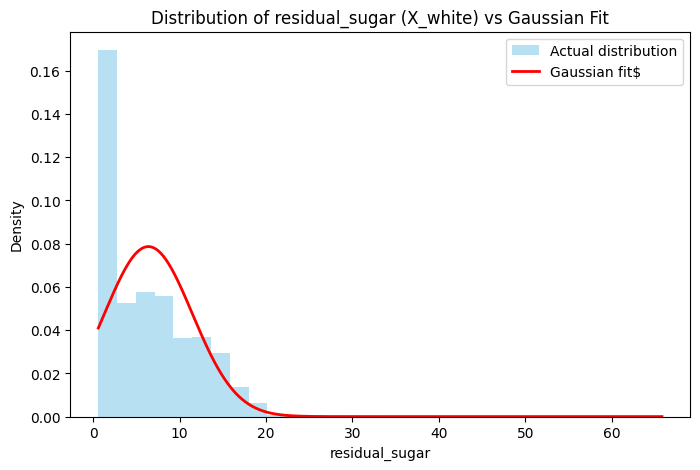

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm

feature = X_white['residual_sugar'].values

mu = np.mean(feature)
sigma = np.std(feature)

plt.figure(figsize=(8, 5))
count, bins, ignored = plt.hist(feature, bins=30, density=True, alpha=0.6, color='skyblue', label='Actual distribution')

x = np.linspace(feature.min(), feature.max(), 1000)
plt.plot(x, norm.pdf(x, mu, sigma), 'r', lw=2,
         label=f'Gaussian fit$')

plt.title('Distribution of residual_sugar (X_white) vs Gaussian Fit')
plt.xlabel('residual_sugar')
plt.ylabel('Density')
plt.legend()
plt.show()


The tests below show that, for our dataset, the results of our implementation are identical to sklearn's `GaussianNB`, with all differences being zero. This exact match is largely due to converting `X_train` and `y_train` into NumPy arrays in our `train()` method:

```python
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.values
if isinstance(y_train, pd.Series):
    y_train = y_train.values
```

This conversion mirrors what sklearn does internally and ensures identical numerical operations. While this approach is specific to pandas datasets, without it, minor differences would appear due to how arithmetic is handled between pandas objects and NumPy arrays. However, these differences are extremely small, on the order of 1e-12 to 1e-17, and do not affect the final outcome. We also verified that removing this conversion still passes all checks, with the accuracy scores unchanged.

In [ ]:
X_train, X_test, y_train, y_test = \
  train_test_split(X_red, y_red, \
  test_size=0.3, random_state=2025, stratify=y_red)

g = GaussianNB()
g.fit(X_train, y_train)

m = GaussianNaiveBayes()
m.train(X_train, y_train)

print(g.theta_ - m.mu)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
print(g.var_ - m.var)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
diff = g._joint_log_likelihood(X_test) - m._joint_log_likelihood(X_test)

print(np.allclose(diff, 0, atol=1e-12))

True
